<a href="https://colab.research.google.com/github/lucapqg/Statistic/blob/main/benford_law_elections_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>LEI DE NEWCOMB-BENFORD</strong></h1>


Em meados de 1881, o astrônomo e matemático Simon Newcomb percebeu folheando em um livro de tabelas logarítmicas (nessa época não existia calculadoras científicas Casio) que as primeiras páginas eram muito mais gastas do que as últimas.
Em seu artigo *Note on the Frequency of Use of the Different Digits in Natural Numbers* publicado na American Journal of Mathematics, ele diz: 
 
***Que os dez dígitos não ocorrem em frequências iguais, deve ser evidente para quem faz muito uso de tabelas logarítmicas, e percebe o quão mais rápido as primeiras páginas se desgastam do que as últimas. O primeiro algarismo significativo é mais frequente o 1 do que qualquer outro dígito, e a frequência diminui até o 9.***
 
Já em 1993 o físico Frank Benford coletou diversos dados de diversas fontes diferentes como massas moleculares, áreas, constantes, cotações de ações da bolsa de valores, valores em revistas, contas e etc., e também evidenciou a constatação que Newcomb, a de que os números haviam uma distribuição não uniforme como intuitivamente costumamos achar, e sim bem definida na natureza.
 
Isso o levou a formulação do modelo estatístico que hoje conhecemos por lei de Benford também conhecida como lei de Newcomb-Benford ou lei do primeiro dígito.




<h1>$$P(d) = \frac{\lim(1+\frac{1}{d})}{\lim(10)}$$</h1>

A lei Benford pode ser estendida às demais posições além do primeiro dígito, tendo a generalização da lei sendo a probabilidade de um número d, 0 > d> 9, ser encontrado na n-ésima posição. Essa probabilidade é dada como:


<h1>$${\displaystyle \sum _{k=10^{n-2}}^{10^{n-1}-1}\log _{10}\left(1+{\frac {1}{10k+d}}\right)}$$</h1>


Uma das principais aplicações da lei de Newcomb-Benford é no ramo de fraudes 
fiscais, sendo possível observar a existência de comportamentos anômalos em uma distribuição. Existem também aplicações para estudos metabólicos, verificação de integridade de imagens e vídeos para saber se houve algum tipo de manipulação e alteração e muitas outras aplicações.


In [174]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy.stats import chi2
from statsmodels.stats.power import GofChisquarePower
import math

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# **Eleições**

Neste tutorial iremos demonstrar o uso do modelo teorizado por Benford aplicado a fraudes eleitorais, utilizando as bases de dados das eleições presidenciais na Rússia em 2018 e das eleições presidenciais no Brasil em 2022.

><h2><strong>Rússia</strong></h2>

In [175]:
df = pd.read_parquet('/content/drive/MyDrive/GitHub/benford-law/archive/voting_russ_2018.parquet')
df.head(3)

,region_name,subregion_name,Baburin Sergei Nikolaevich,Grudinin Pavel Nikolaevich,Zhirinovskiy Vladimir Volfovich,Putin Vladimir Vladimirovich,Sobchak Ksenia Anatolyevna,Suraikin Maksim Aleksandrovich,Titov Boris Yurievich,Yavlinskiy Gregory Alekseivich,...,Number of voters enlisted,Number of ballot papers in portable ballot boxes,Number of ballot papers given inside the polling station,Number of ballot papers given outside the polling station,Number of ballot papers given for advance voting,Number of excessive ballot papers,Number of ballot papers acquired at the polling station,Number of invalid ballot papers,Number of unused ballot papers,Number of lost ballot papers
ps_id,,,,,,,,,,,,,,,,,,,,,
713,Altajskij kraj,Bystroistokskaa,1,109,42,398,2,3,0,0,...,815,139,421,139,0,0,750,5,190,0
714,Altajskij kraj,Bystroistokskaa,4,27,27,199,0,3,0,0,...,355,38,224,38,0,0,350,2,88,0
715,Altajskij kraj,Bystroistokskaa,3,100,47,325,2,1,2,1,...,812,63,424,63,0,0,750,6,263,0


Primeiro iremos pegar a coluna da contagem de votos em Putin (que estranhamente está há mais de 20 anos no poder de forma ''democrática'') e iremos separar o primeiro dígito dos numerais maiores ou iguais a 10.

In [176]:
column = 'Putin Vladimir Vladimirovich'
# PRIMEIRO DIGITO
first = df[column].apply(lambda x: int(str(x)[0]))

Faremos a contagem de cada primeiro dígito e a porcentagem que cada um representa na distribuição de votos.

In [177]:
# CONTAGEM 
observed_values =  (first.value_counts()
                         .sort_index(ascending=True)
                         .to_numpy())
# TOTAL 
total_observed = observed_values.sum()

print(f'Values:{observed_values}')

# PORCENTAGEM DOS DADOS OBSERVADOS
observed_p = (observed_values/total_observed)
print(f'Percent:{observed_p}')

Values:[    2 28368 10761  8182  7610  7781  8196  8252  8002  7333]
Percent:[2.11669330e-05 3.00231778e-01 1.13888683e-01 8.65939230e-02
 8.05401801e-02 8.23499529e-02 8.67420915e-02 8.73347656e-02
 8.46888990e-02 7.76085599e-02]


Agora iremos aplicar a fórmula de Benford  para obtermos as distribuições de probabilidade de cada dígito e que também pode ser simplificada para:
<h1>$$P(d) = log{_{10}}(1+\frac{1}{d})$$</h1>
 
 
 
Também iremos aplicar a distribuição ao total observado das contagens de cada dígito para obtermos os valores esperados de acordo com a lei de benford.


In [178]:
# DISTRIBUIÇÃO DE BENFORD
expected_p = [np.log10(1+1.0/d) for d in range(1,10)]

# VALORES ESPERADOS DE ACORDO COM A DISTRIBUIÇÃO DE BENFORD
expected_values = [round((p * total_observed)) for p in expected_p]
print(f'Values:{expected_values}')
print(f'Percent:{expected_p}')

Values:[28443, 16638, 11805, 9157, 7482, 6326, 5479, 4833, 4323]
Percent:[0.3010299956639812, 0.17609125905568124, 0.12493873660829992, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


Para testar nossas hipóteses, iremos utilizar o teste de qui quadrado. Sabendo que o teste de qui é sensível ao tamanho das amostras e variabilidade, faremos a amostragem 20 vezes da nossa população de dígitos para reduzir a variabilidade e a chance de selecionar uma amostra que não seja representativa.

Faremos cálculos de poder estatístico para um teste de qui-quadrado para saber o tamanho mínimo de nossas amostras, de acordo com os graus de liberdade e nível de significância.



  POWER:0.8892008620847722
  SIZE: 197
  Critical value at a P-value of 0.05 is 15.50731305586545 to the first digit
  Critical value at a P-value of 0.05 is 16.918977604620448 to the second digit
  



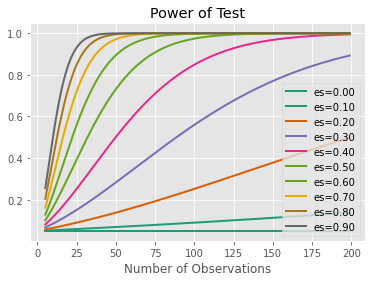

In [179]:
analysis = GofChisquarePower()

total_amostras = 20
effect_sizes = np.arange(0,1,0.1)
sample_sizes = np.arange(5,200)
alpha = 0.05
power = 0.89


n_chi = int(analysis.solve_power(effect_size=0.3,power=power, alpha=alpha,n_bins=8))
power_chi = analysis.solve_power(effect_size=0.3,power=None, alpha=alpha,nobs=n_chi,n_bins=8)

deg_f = 9-1
sig = 0.05
valor_critico_chi_1 = chi2.ppf(1-sig, 8) # VALOR CRITICO PARA O PRIMEIRO DIGITO 
valor_critico_chi_2 = chi2.ppf(1-sig, 9) # VALOR CRITICO PARA O SEGUNDO DIGITO 

print(f"""
  POWER:{power_chi}
  SIZE: {n_chi}
  Critical value at a P-value of 0.05 is {valor_critico_chi_1} to the first digit
  Critical value at a P-value of 0.05 is {valor_critico_chi_2} to the second digit
  
""")

analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes,n_bins=8)
plt.show()

> **Função de Qui-quadrado**


• Se **χ2** calculado ≥ **χ2** crítico: Rejeita-se a hipótese nula (existência de fraude).

• Se **χ2** calculado < **χ2** crítico: Aceita-se a hipótese nula (não existência de fraude).

In [180]:
def chi_square_test(data_count,expected_counts,ddof=8,sig=0.05):
    """Return statistics values on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected,2)

        chi_square_stat += chi_square / expected

    p_value = chi2.sf(x=chi_square_stat,df=ddof)

    return chi_square_stat,p_value

Criaremos uma função para aplicar e avalliar o modelo de Newcomb-Benford.




In [181]:
def newcomb_benford(x,percent = False,ddof = 8,chi_test=False,digit=1):

  digits ,observed_values = np.unique(x, return_counts=True)

  if digit == 1:
    observed_values = observed_values[1:]

  total_observed = np.sum(observed_values) # FREQUENCIA TOTAL OBSERVADA
  observed_p = (observed_values/total_observed) # PERCENTUAL DE FREQUENCIA OBSERVADA

  if digit == 1: # PRIMEIRO DIGITO
    expected_p = [np.log10(1+1.0/d) for d in range(1,10)]
    expected_values = [round((p * total_observed)) for p in expected_p]
  else: # GENERALIZAÇÃO 
    N = digit
    ini = 10**(N-2)
    end = 10**(N-1) - 1
    
    bfg = (lambda D,ini,end: np.sum([np.log10(1 + 1/(10*K+D)) for K in range(ini,end+1,1)]))
    expected_p = [bfg(i,ini,end)for i in range(0,10)]
    expected_values = [round((p * total_observed)) for p in expected_p]

  if chi_test:
    return chi_square_test(observed_values,expected_values,ddof=ddof)
  if percent:
    return observed_p,expected_p
  else:
    return observed_values,expected_values

>**Dígitos**

In [182]:
first = df[column].apply(lambda x: int(str(x)[0]))
second = df.loc[df[column]>=10,column].apply(lambda x: int(str(x)[1]))

>**Benford**

Graficamente o comportamento observado dos primeiros e segundos dígitos em relação as frequências esperadas não parecem satisfazer modelo.

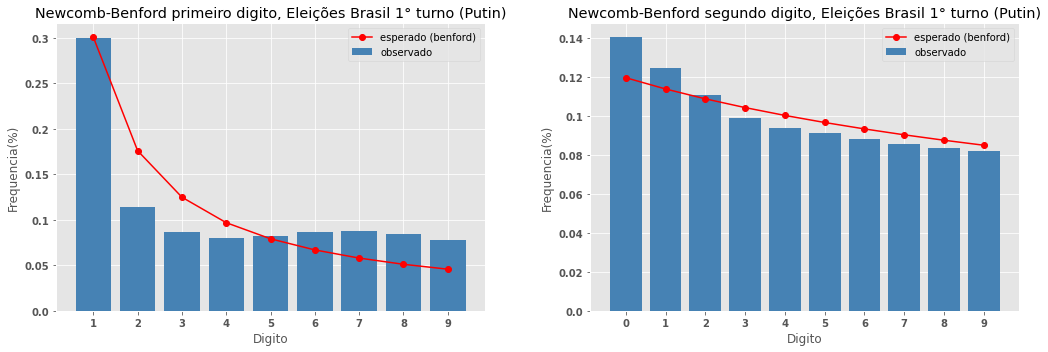

In [183]:
observed_p_2, expected_p_2 = newcomb_benford(second,percent = True,ddof = 9,digit=2)

observed_p_1, expected_p_1 = newcomb_benford(first,percent = True)

x = np.arange(1,10)
fig, ax  = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x,expected_p_1,color='red',marker='o',label='esperado (benford)')
ax[0].bar(x,observed_p_1,color='#4682B4',label='observado')
ax[0].set_title('Newcomb-Benford primeiro digito, Eleições Brasil 1° turno (Putin)')
ax[0].set_ylabel('Frequencia(%)')
ax[0].set_xlabel('Digito')
ax[0].set_xticks(x)
ax[0].set_yticklabels(np.round(ax[0].get_yticks(),2), weight='bold')
ax[0].set_xticklabels(ax[0].get_xticks(),  weight='bold')
ax[0].legend()

x = np.arange(0,10)
ax[1].plot(x,expected_p_2,color='red',marker='o',label='esperado (benford)')
ax[1].bar(x,observed_p_2,color='#4682B4',label='observado')
ax[1].set_title('Newcomb-Benford segundo digito, Eleições Brasil 1° turno (Putin)')
ax[1].set_ylabel('Frequencia(%)')
ax[1].set_xlabel('Digito')
ax[1].set_xticks(x)
ax[1].set_yticklabels(np.round(ax[1].get_yticks(),2), weight='bold')
ax[1].set_xticklabels(ax[1].get_xticks(),  weight='bold')
ax[1].legend()


fig.tight_layout()

>**Teste de hipótese**

Foi aplicado o teste de **qui-quadrado** e amostragem da população 20 vezes, para obter a média das estatísticas de X² e verificar se a distribuição dos primeiros e segundos dígitos seguem as frequências de Newcomb-Benford.

In [184]:
# AMOSTRAGEM
amostras_putin = pd.DataFrame()

amostras_putin_1 = pd.concat([first.sample(n_chi).reset_index(drop=True) for _ in range(total_amostras)],axis=1,ignore_index=True)
amostras_putin_2 = pd.concat([second.sample(n_chi).reset_index(drop=True) for _ in range(total_amostras)],axis=1,ignore_index=True)

In [185]:
chi_putin = amostras_putin_1.apply(lambda amostra:newcomb_benford(amostra,chi_test = True)[0]).mean()

print(f"""
BENFORD LAW - PRIMEIRO DIGITO

  PUTIN:
  statistic = {chi_putin} 
  pvalue = {np.round(chi2.sf(x=chi_putin ,df=8),2)}

(CRITICAL VALUE = {valor_critico_chi_1} PARA PVALUE=0.05)
""")


BENFORD LAW - PRIMEIRO DIGITO

  PUTIN:
  statistic = 52.179952805324206 
  pvalue = 0.0

(CRITICAL VALUE = 15.50731305586545 PARA PVALUE=0.05)



In [186]:
# TESTE DE QUI QUADRADO

chi_putin = amostras_putin_2.apply(lambda amostra:newcomb_benford(second,percent = True,ddof = 9,digit=2,chi_test = True)[0]).mean()

print(f"""
BENFORD LAW - SEGUNDO DIGITO

  PUTIN:
  statistic = {chi_putin} 
  pvalue = {np.round(chi2.sf(x=chi_putin ,df=8),2)}

(CRITICAL VALUE = {valor_critico_chi_2} PARA PVALUE=0.05)
""")



BENFORD LAW - SEGUNDO DIGITO

  PUTIN:
  statistic = 611.367769325489 
  pvalue = 0.0

(CRITICAL VALUE = 16.918977604620448 PARA PVALUE=0.05)



O resultado do teste obteve estatística suficiente para rejeitar a hipótese nula tanto nos primeiros dígitos, quanto para os segundos, indicando a possibilidade de fraude nas eleições presidenciais na Rússia em 2018.

><h2><strong>BRASIL</strong></h2>

In [187]:
df_brazil = pd.read_parquet('/content/drive/MyDrive/GitHub/benford-law/archive/eleicoes_brasil_turno1.parquet')
df_brazil.head(3)


,ANO_ELEICAO,NM_PARTIDO,NM_CANDIDATO,NR_CANDIDATO,CD_CARGO,DS_CARGO,CD_TIPO_ELEICAO,NM_COLIGACAO,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,DS_SIT_TOT_TURNO
0,2022,Partido dos Trabalhadores,CARLA SIMARA LUCIANA DA SILVA SALASÁRIO AYRES,1344,6,Deputado Federal,2,FEDERAÇÃO,Válido,0,SUPLENTE
1,2022,Partido dos Trabalhadores,LIROUS K YO FONSECA ÁVILA,1303,6,Deputado Federal,2,FEDERAÇÃO,Válido,0,SUPLENTE
2,2022,Democracia Cristã,SILVIA LIMA FERREIRA,27373,7,Deputado Estadual,2,PARTIDO ISOLADO,Válido,0,NÃO ELEITO


In [188]:
column = 'QT_VOTOS_NOMINAIS_VALIDOS'
df_lula = df_brazil.loc[df_brazil.NM_CANDIDATO.str.contains("LUIZ INÁCIO LULA DA SILVA"),[column]]
df_bolsonaro = df_brazil.loc[df_brazil.NM_CANDIDATO.str.contains("BOLSONARO"),[column]]


**Digitos**

In [189]:
bolsonaro_first_d = pd.Series(df_bolsonaro[column].apply(lambda x: int(str(x)[0])),name='d_first')
bolsonaro_second_d = pd.Series(df_bolsonaro.loc[df_bolsonaro[column]>=10,column].apply(lambda x: int(str(x)[1])),name='d_second')

lula_first_d = pd.Series(df_lula[column].apply(lambda x: int(str(x)[0])),name='d_first')
lula_second_d = pd.Series(df_lula.loc[df_lula[column]>=10,column].apply(lambda x: int(str(x)[1])),name='d_second')


**Benford**


Pode-se reparar nos gráficos dos dois candidatos mais votados no Brasil que que as duas distribuições para o primeiro dígito seguem as frequências de Benford, indicando que não houve fraude no ano vigente desta eleição.


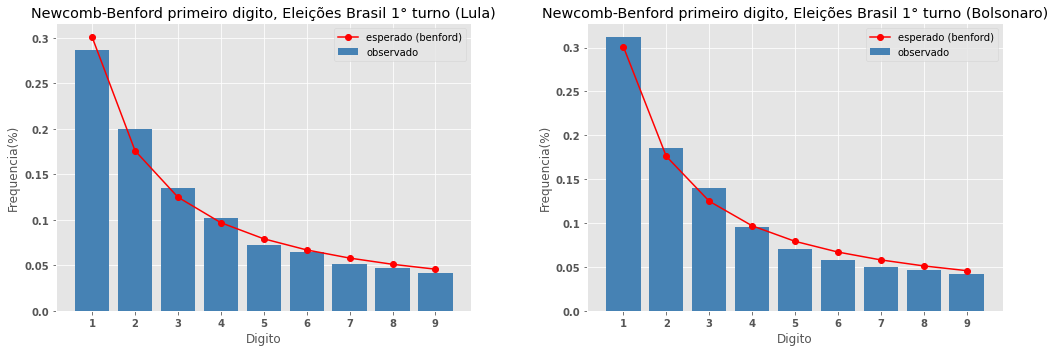

In [190]:
#TOTAL

observed_p_1_lula, expected_p_1_lula = newcomb_benford(lula_first_d,percent = True)
observed_p_1_bol , expected_p_1_bol = newcomb_benford(bolsonaro_first_d,percent = True)

x = np.arange(1,10)
fig, ax  = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x,expected_p_1_lula,color='red',marker='o',label='esperado (benford)')
ax[0].bar(x,observed_p_1_lula,color='#4682B4',label='observado')
ax[0].set_title('Newcomb-Benford primeiro digito, Eleições Brasil 1° turno (Lula)')
ax[0].set_ylabel('Frequencia(%)')
ax[0].set_xlabel('Digito')
ax[0].set_xticks(x)
ax[0].set_yticklabels(np.round(ax[0].get_yticks(),2), weight='bold')
ax[0].set_xticklabels(ax[0].get_xticks(),  weight='bold')
ax[0].legend()

ax[1].plot(x,expected_p_1_bol,color='red',marker='o',label='esperado (benford)')
ax[1].bar(x,observed_p_1_bol,color='#4682B4',label='observado')
ax[1].set_title('Newcomb-Benford primeiro digito, Eleições Brasil 1° turno (Bolsonaro)')
ax[1].set_ylabel('Frequencia(%)')
ax[1].set_xlabel('Digito')
ax[1].set_xticks(x)
ax[1].set_yticklabels(np.round(ax[1].get_yticks(),2), weight='bold')
ax[1].set_xticklabels(ax[1].get_xticks(),  weight='bold')
ax[1].legend()


fig.tight_layout()

Já para o segundo dígito as frequências observadas atendem as frequências do modelo de Benford.

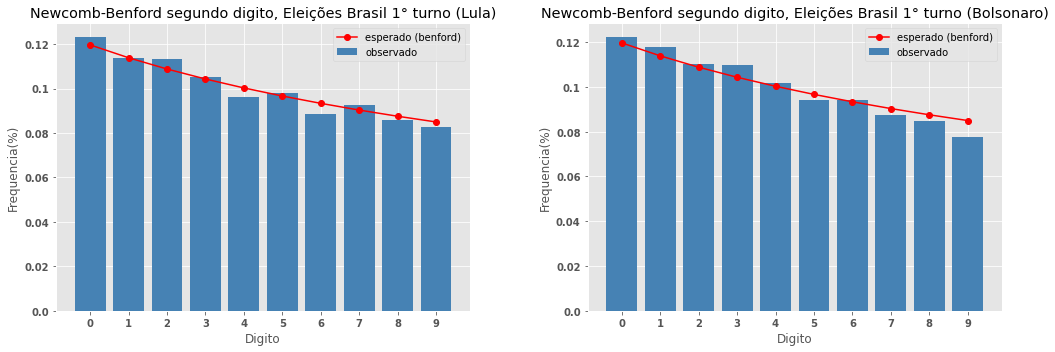

In [191]:
#TOTAL

observed_p_2_lula, expected_p_2_lula = newcomb_benford(lula_second_d,percent = True,ddof = 9,digit=2)
observed_p_2_bol , expected_p_2_bol = newcomb_benford(bolsonaro_second_d,percent = True,ddof = 9,digit=2)

x = np.arange(0,10)
fig, ax  = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x,expected_p_2_lula,color='red',marker='o',label='esperado (benford)')
ax[0].bar(x,observed_p_2_lula,color='#4682B4',label='observado')
ax[0].set_title('Newcomb-Benford segundo digito, Eleições Brasil 1° turno (Lula)')
ax[0].set_ylabel('Frequencia(%)')
ax[0].set_xlabel('Digito')
ax[0].set_xticks(x)
ax[0].set_yticklabels(np.round(ax[0].get_yticks(),2), weight='bold')
ax[0].set_xticklabels(ax[0].get_xticks(),  weight='bold')
ax[0].legend()

ax[1].plot(x,expected_p_2_bol,color='red',marker='o',label='esperado (benford)')
ax[1].bar(x,observed_p_2_bol,color='#4682B4',label='observado')
ax[1].set_title('Newcomb-Benford segundo digito, Eleições Brasil 1° turno (Bolsonaro)')
ax[1].set_ylabel('Frequencia(%)')
ax[1].set_xlabel('Digito')
ax[1].set_xticks(x)
ax[1].set_yticklabels(np.round(ax[1].get_yticks(),2), weight='bold')
ax[1].set_xticklabels(ax[1].get_xticks(),  weight='bold')
ax[1].legend()

fig.tight_layout()

>**Teste de hipótese**

Realizando o teste de hipótese foi observado que nenhuma das distribuições (sejam dos primeiros ou dos segundos dígitos) dos dois candidatos à presidência do país obteve uma estatística significante para rejeitar a hipótese nula, sendo assim podemos inferir que não houveram fraudes nas votações.

In [192]:
# AMOSTRAGEM
amostras_lula_1 = pd.DataFrame()
amostras_lula_2 = pd.DataFrame()

amostras_bolsonaro_1 = pd.DataFrame()
amostras_bolsonaro_2 = pd.DataFrame()

amostras_lula_1 = pd.concat([lula_first_d.sample(n_chi).reset_index(drop=True) for _ in range(total_amostras)],axis=1,ignore_index=True)
amostras_lula_2 = pd.concat([lula_second_d.sample(n_chi).reset_index(drop=True) for _ in range(total_amostras)],axis=1,ignore_index=True)


amostras_bolsonaro_1 = pd.concat([bolsonaro_first_d.sample(n_chi).reset_index(drop=True) for _ in range(total_amostras)],axis=1,ignore_index=True)
amostras_bolsonaro_2 = pd.concat([bolsonaro_second_d.sample(n_chi).reset_index(drop=True) for _ in range(total_amostras)],axis=1,ignore_index=True)

In [193]:
# TESTE DE QUI QUADRADO
chi_lula = amostras_lula_1.apply(lambda amostra:newcomb_benford(amostra,chi_test = True)[0]).mean()

chi_bolsonaro = amostras_bolsonaro_1.apply(lambda amostra:newcomb_benford(amostra,chi_test = True)[0]).mean()

print(f"""
BENFORD LAW - PRIMEIRO DIGITO


  LULA: 
  statistic = {chi_lula} 
  pvalue = {chi2.sf(x=chi_lula ,df=8)}

  BOLSONARO: 
  statistic = {chi_bolsonaro} 
  pvalue = {chi2.sf(x=chi_bolsonaro ,df=8)}
  
CRITICAL VALUE = {valor_critico_chi_1} PARA PVALUE=0.05 
""")


BENFORD LAW - PRIMEIRO DIGITO


  LULA: 
  statistic = 8.705709242333333 
  pvalue = 0.3677269367796664

  BOLSONARO: 
  statistic = 8.893765666209067 
  pvalue = 0.35133694352492756
  
CRITICAL VALUE = 15.50731305586545 PARA PVALUE=0.05 



In [194]:
# TESTE DE QUI QUADRADO
chi_lula = amostras_lula_2.apply(lambda amostra:newcomb_benford(amostra,chi_test = True,ddof = 9,digit=2)[0]).mean()

chi_bolsonaro = amostras_bolsonaro_2.apply(lambda amostra:newcomb_benford(amostra,chi_test = True,ddof = 9,digit=2)[0]).mean()

print(f"""
BENFORD LAW - SEGUNDO DIGITO


  LULA: 
  statistic = {chi_lula} 
  pvalue = {chi2.sf(x=chi_lula ,df=9)}

  BOLSONARO: 
  statistic = {chi_bolsonaro} 
  pvalue = {chi2.sf(x=chi_bolsonaro ,df=9)}
  
CRITICAL VALUE = {valor_critico_chi_2} PARA PVALUE=0.05 
""")


BENFORD LAW - SEGUNDO DIGITO


  LULA: 
  statistic = 9.553554100268496 
  pvalue = 0.38782011650886045

  BOLSONARO: 
  statistic = 10.338260591317866 
  pvalue = 0.3238014477955585
  
CRITICAL VALUE = 16.918977604620448 PARA PVALUE=0.05 



**CONCLUSÃO**

Neste tutorial foi demonstrado como aplicar o modelo de Benford às votações eleitorais e realizar conclusões acerca da existência de fraude nesses dados utilizando o modelo de Benford, teste de hipótese e amostragem.

**REFERÊNCIAS**

- Simon Newcomb, Note on the Frequency of Use of the Different Digits in Natural Numbers, American Journal of Mathematics 4 (1881) 39-40

- Frank Benford, The law of anomalous numbers, Proceedings of the American Philospphical Society 78 (1938) 551-572

- Daniel Bergh, Chi-Squared Test of Fit and Sample Size—
A Comparison between a Random Sample Approach
and a Chi-Square Value Adjustment Method

- https://pt.wikipedia.org/wiki/Lei_de_Benford

- https://www.tse.jus.br/comunicacao/noticias/2022/Maio/fato-ou-boato-e-mentira-que-lei-de-benford-provou-fraude-nas-eleicoes-brasileiras




**BASES DE DADOS UTILIZADAS**

- https://www.kaggle.com/datasets/valenzione/russian-presidental-elections-2018-voting-data
- https://dadosabertos.tse.jus.br/dataset/resultados-2022